# EP 1 - Modelagem e Simulação


#Preliminares

Para rodar jupyter, é necessário setar a variavel path para o caminho onde os dados estão. Ela está setada como dados/ por padrão, mas pode ser alterada. 

Se o jupyter estiver sendo executado pelo drive, basta descomentar as primeiras duas linhas abaixo:

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


#variavel que indica a pasta em que os dados estão
path = 'dados/'

Mounted at /content/drive


#Introdução

Neste EP, nosso grupo decidiu realizar a modelagem dos experimentos de queda livre e do bloco em rampa. Esses movimentos foram modelados da seguinte forma:

###Movimento de queda livre:

Para achar a equação da aceleração, velocidade e posição do movimento de queda livre, consideramos que a força de resistencia do ar é proporcional ao quadrado da velocidade e, a partir daí, resolvemos a equação diferencial:

$\frac{kv^{2}}{m} + v' = g$

Ao resolver essa equação, chegamos nas seguintes funções:

$x(t) = \frac{m}{k} \ln(cosh(t \sqrt{\frac{kg}{m}}))$

$v(t) = \sqrt{\frac{mg}{k}}\tanh({t \sqrt{\frac{kg}{m}}})$ (pois a velocidade $v_{0} = 0$)

$a(t) = g(1 - (\tanh(t \sqrt{\frac{kg}{m}}))^{2})$

Para conseguir os dados experimentais a partir da aceleração experimental basta substituir na ultima equação, encontrar k e calcular v(t) e S(t) explicitamente.

###Movimento do bloco em rampa:

Considerando a resultante da força na direção de descida, temos que:

$F = (mg\sin 𝜃) - (mgμ \cos 𝜃)$

$ma = (mg\sin 𝜃) - (mgμ \cos 𝜃)$

$a = g(\sin 𝜃 - \mu \cos 𝜃)$

Logo, a equação da velocidade ($v$) e da posição ($S$) serão dadas por:

$v =  g(\sin 𝜃 - \mu \cos 𝜃)t$

$S = {g(\sin 𝜃 - \mu \cos 𝜃)t^{2} \over 2}$

###Implementação do método de euler e das funções acima:



In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

g = 9.8

# implementacao do metodo de euler
# os argumentos são: x = o valor conhecido de f em x1, dx é a derivada de f em x1 e
# h é o tamanho do paso
def euler_method(x, dx, h):
  return x + dx*h

# essas são as implementações das funções do movimento descritas acima
def aceleracao_queda_livre(m, k, t):
  return g*(1-(np.tanh(t*np.sqrt(k*g/m))**2))

def velocidade_queda_livre(m, k, t):
  return np.sqrt(m*g/k)*np.tanh(t*np.sqrt(k*g/m))

def posicao_queda_livre(m, k, t):
  return (m/k)*np.log(np.cosh(t*np.sqrt(k*g/m)))

def aceleracao_bloco_em_rampa(theta, u, t):
  return g*(math.sin(theta)-u*math.cos(theta))

def velocidade_bloco_em_rampa(theta, u, t):
  return g*(math.sin(theta)-u*math.cos(theta))*t

def posicao_bloco_em_rampa(theta, u, t):
  return  g*(math.sin(theta)-u*math.cos(theta))*t**2/2


#Funções para criar os dados da simulação

In [ ]:
# Retorna um np array com os N instantes de tempo igualmente espaçados 
def get_tempos(N, tempo_inicial, tempo_final):
  return np.linspace(tempo_inicial, tempo_final, N)

# Retorna um np array dos dados simulados para a respectiva callback
def get_dados_simulados_bloco_em_rampa(tempos, callback_de_simulacao, theta, u):
  arr = []

  for t in tempos:
    arr.append(callback_de_simulacao(theta, u, t))

  return np.array(arr)

# Retorna um np array dados simulados para a respectiva callback
def get_dados_simulados_queda_livre(tempos, callback_de_simulacao, k, m):
  arr = []

  for t in tempos:
    arr.append(callback_de_simulacao(m, k, t))

  return np.array(arr)

# Plotando listas
def plot_arrays(x, y, label_x, label_y, title):
  plt.figure()
  plt.plot(x, y)
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.title(title)
  plt.show()


##Carregando os dados:

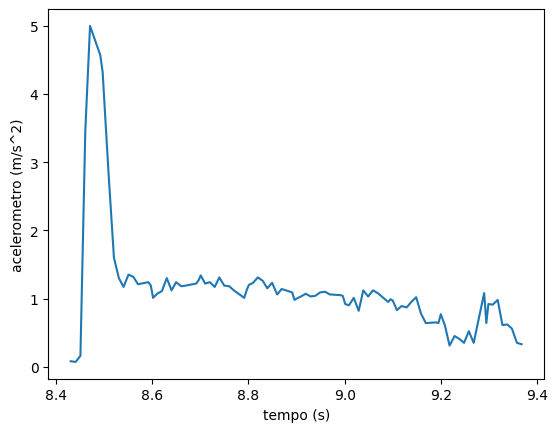

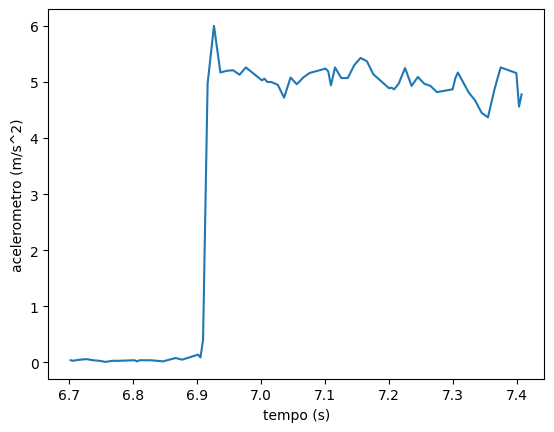

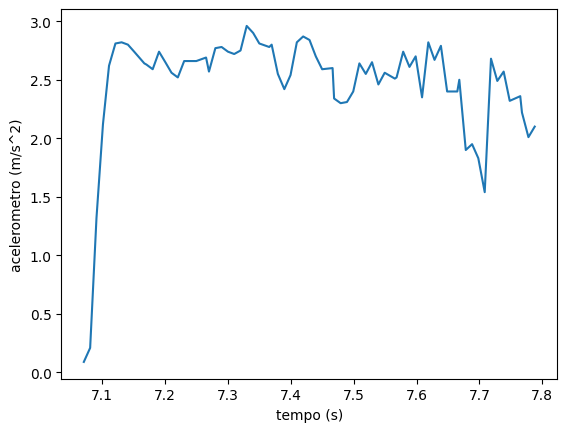

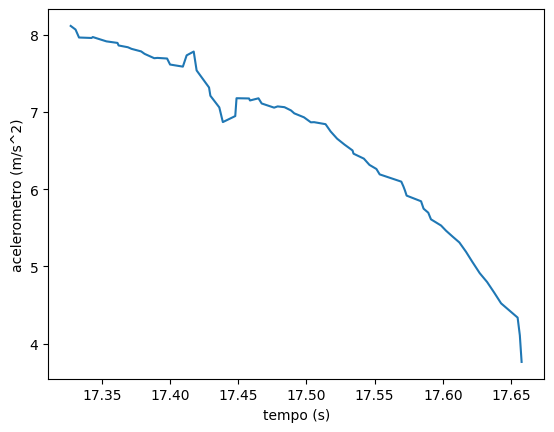

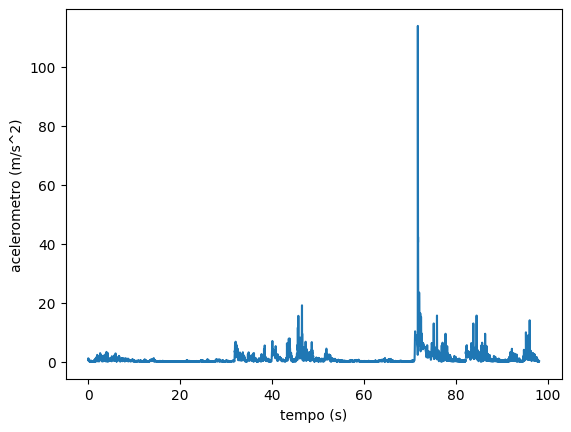

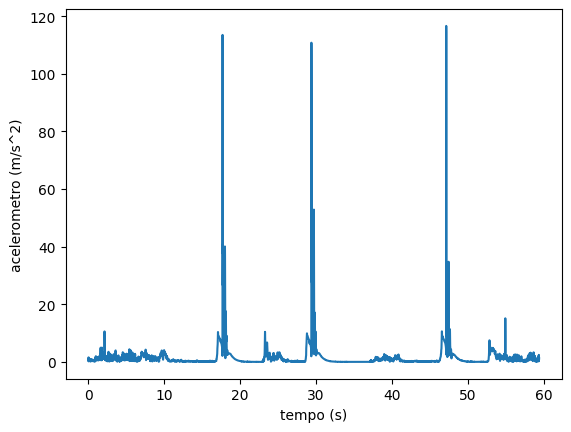

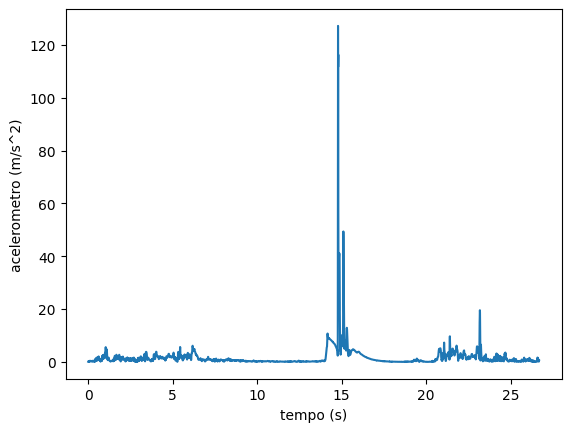

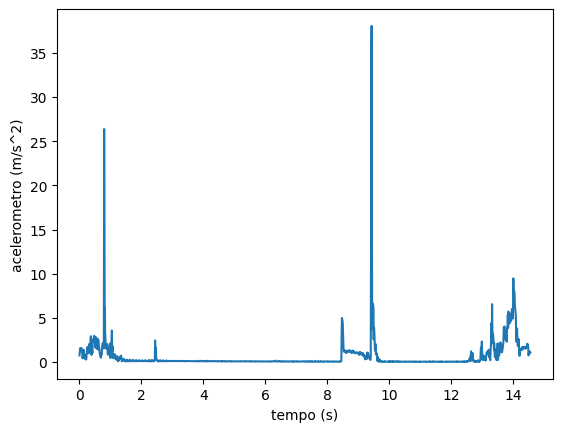

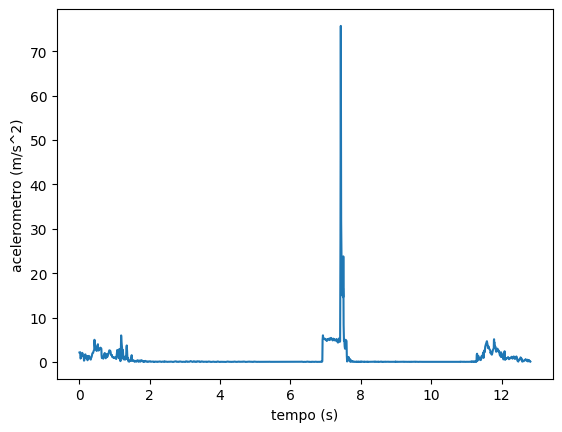

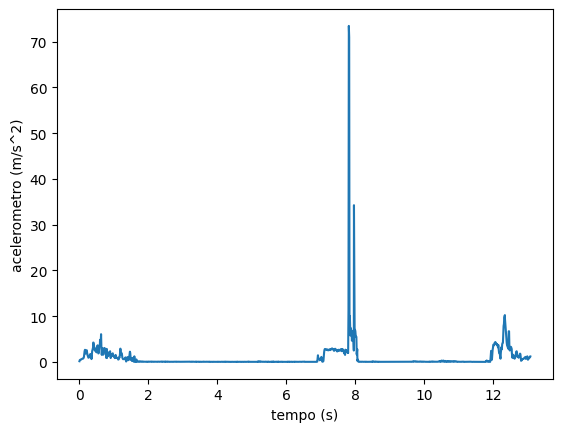

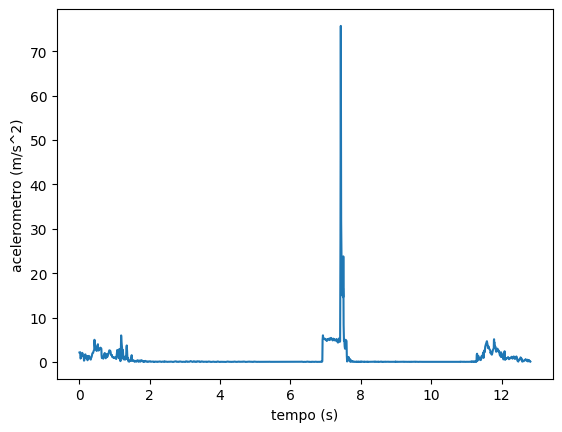

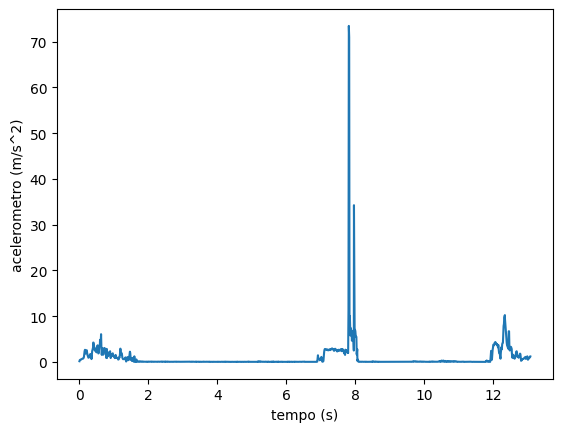

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from google.colab import files
import random
# Função basica para carregar os arquivos .csv
def carrega_csv(filename, separator=';'): 
  file = path + filename
  data = pd.read_csv(file, sep=separator, encoding='utf-8', decimal=',')
  return data


def plot_tempo_por_aceleracao(data):
  tempo = data["time"].astype(float)
  resultante = data["aT (m/s^2)"].astype(float)
  plt.figure()
  plt.plot(tempo, resultante)
  plt.xlabel('tempo (s)')
  plt.ylabel('acelerometro (m/s^2)')
  plt.show()

# Retorna os picos do movimento. Um ponto é considerado pico, nessa função, se a aceleração nele valer mais
# de 20 e não tiver outro ponto com valor maior em 1000 indices de distancia.
# Essa função é usada para achar o começo do movimento
def get_picos_do_movimento(movimento):
  peaks = find_peaks(movimento["aT (m/s^2)"], height = 20, distance = 1000)[0]
  return peaks

# Essa função usa a função anterior para plotar apenas a aceleração durante o movimento realizado
# Nessa função, os parametros a e b são usados para indicar o intervalo ao redor do pico que será considerado
def plot_aceleracao_durante_movimento(data, a=-200, b=-5):
  peaks = get_picos_do_movimento(data)
  
  for i in peaks:
    plot_tempo_por_aceleracao(data[(i+a):i+b])
                                                

  return

# Essa função é usada para conseguir os dados de velocidade em um dimensão especifica (entre x, y e z)
# para conseguir a velocidade, é utilizado o método de euler
# A função retorna um vetor de tuplas na forma (velocidade, tempo)
def get_velocidade_em_dimensao(data, dimensao, a=-200, b=-5):
  peaks = get_picos_do_movimento(data)
  movimentos_realizados = []
  for i in peaks:
    movimentos_realizados.append(data[(i+a):i+b])

  velocidades = []
  velocidade_atual = 0
  proxima_velocidade = 0
  for movimento in movimentos_realizados:
    velocidade_atual = 0
    velocidade_no_movimento = []
    t0 = None
    for i, row in movimento.iterrows():
      if not t0:
        t0 = data["time"][i]
      velocidade_no_movimento.append((velocidade_atual, data["time"][i] -t0))
      proxima_velocidade = euler_method(velocidade_atual, row[dimensao], data["time"][i+1] - data["time"][i])
      velocidade_atual = proxima_velocidade

    velocidades.append(velocidade_no_movimento)

  return velocidades
  
# Retorna um vetor na forma (velocidades, tempos), em que velocidades e tempos são vetores que descrevem
# um dos movimentos que está no argumento "movimento"
def get_velocidade_durante_movimento(movimento, a , b):

  velocidades_x = get_velocidade_em_dimensao(movimento, "ax (m/s^2)", a, b)
  velocidades_y = get_velocidade_em_dimensao(movimento, "ay (m/s^2)", a, b)
  velocidades_z = get_velocidade_em_dimensao(movimento, "az (m/s^2)", a, b)

  velocidade_resultante = []
  tamanho = len(velocidades_x)
  for i in range(0, tamanho):
    velocidade_no_movimento = []
    tempo = []
    for j in range(0, len(velocidades_x[i])):
       velocidade = math.sqrt(velocidades_x[i][j][0]**2 + velocidades_y[i][j][0]**2 + velocidades_z[i][j][0]**2)
       velocidade_no_movimento.append(velocidade)
       tempo.append(velocidades_x[i][j][1])
    velocidade_resultante.append((velocidade_no_movimento, tempo))
  return velocidade_resultante

# Retorna um vetor de tuplas na forma (posicoes, tempos), em que posicoes e tempos são vetores que descrevem
# um dos movimentos que está em "movimento"
def get_posicao_durante_movimento(movimento, a, b):
  velocidades = get_velocidade_durante_movimento(movimento, a, b)
  posicoes = []
  for (velocidade, tempo) in velocidades:
    posicoes_no_movimento = []
    posicao_atual = 0
    ultima_posicao = 0
    ultimo_tempo = -1
    for i in range(0, len(velocidade)):
      posicoes_no_movimento.append(posicao_atual)
      ultima_posicao = posicao_atual
      if (ultimo_tempo > 0):
        posicao_atual = euler_method(ultima_posicao, velocidade[i], tempo[i] - ultimo_tempo)

      ultimo_tempo = tempo[i]

    posicoes.append((posicoes_no_movimento, tempo))
  return posicoes

def get_aceleracoes_durante_movimento(movimento, a, b):
  peaks = get_picos_do_movimento(movimento)
  aceleracoes = []
  for i in peaks:
    t0 = movimento["time"][i+a]
    aceleracoes.append((movimento["aT (m/s^2)"][i+a:i+b].to_numpy(), (movimento["time"][i+a:i+b]- t0).to_numpy()))

  return aceleracoes
# Plota as posições em movimento com o titulo especificado
def plot_posicoes(data, title):
  posicoes = get_posicao_durante_movimento(data)
  for (posicao, tempo) in posicoes:
      plot_arrays(tempo, posicao, "tempo", "posicao", title)

# Plota as velocidades 
def plot_velocidades(data, title):
  velocidades = get_velocidade_durante_movimento(data)
  for (velocidade, tempo) in velocidades:
      plot_arrays(tempo, velocidade, "tempo", "velocidade", title)

ql03 = carrega_csv("queda-livre03.csv")
ql02 = carrega_csv("queda-livre02.csv")
ql01 = carrega_csv("queda-livre01.csv")


rp05 = carrega_csv("rp05-30graus.csv", ',')
rp05 = rp05.rename(columns={"ax": "ax (m/s^2)", "ay": "ay (m/s^2)", "az": "az (m/s^2)", "atotal": "aT (m/s^2)"}).astype(float)

rp04 = carrega_csv("rp04-45graus.csv", ',')
rp04 = rp04.rename(columns={"ax": "ax (m/s^2)", "ay": "ay (m/s^2)", "az": "az (m/s^2)", "atotal": "aT (m/s^2)"}).astype(float)

rp02 = carrega_csv("rampa02.csv")
rp03 = carrega_csv("rampa03.csv")
rp01 = carrega_csv("rampa01.csv")

plot_aceleracao_durante_movimento(rp01, -100, -5)
plot_aceleracao_durante_movimento(rp02, -75, -2)
plot_aceleracao_durante_movimento(rp03, -75, -2)

plot_aceleracao_durante_movimento(ql01, -100, -5)
plot_aceleracao_durante_movimento(ql02, -75, -5)
plot_aceleracao_durante_movimento(ql03, -100, -5)

plot_tempo_por_aceleracao(ql01)
plot_tempo_por_aceleracao(ql02)
plot_tempo_por_aceleracao(ql03)

plot_tempo_por_aceleracao(rp01)
plot_tempo_por_aceleracao(rp02)
plot_tempo_por_aceleracao(rp03)
plot_tempo_por_aceleracao(rp04)
plot_tempo_por_aceleracao(rp05)



#Comparando o simulado e o experimental


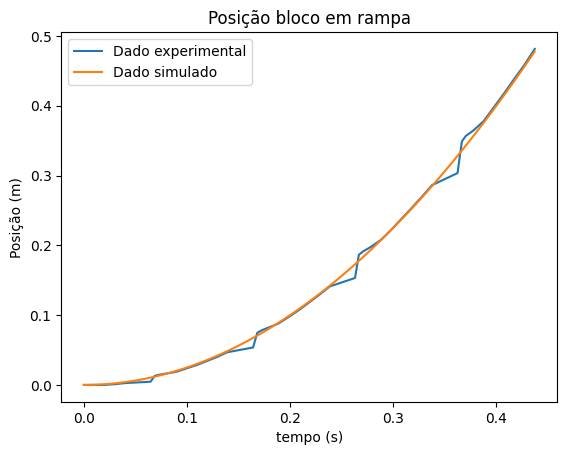

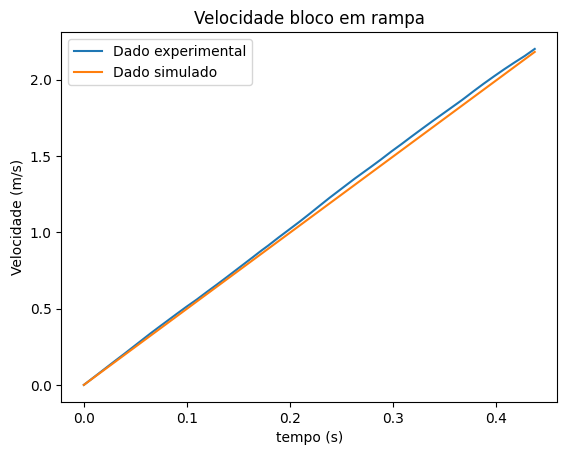

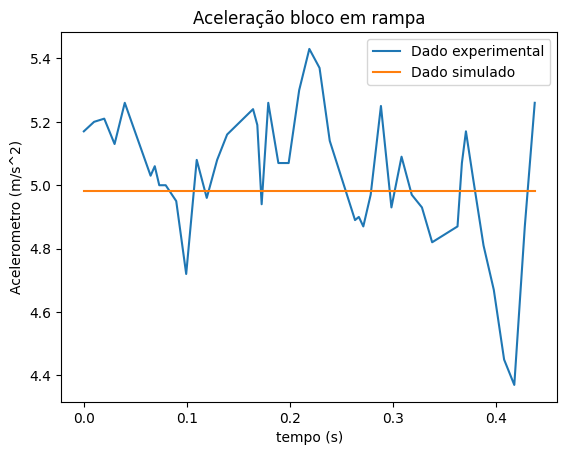

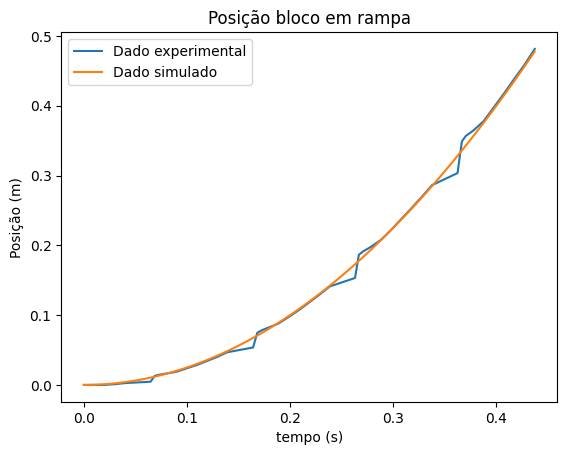

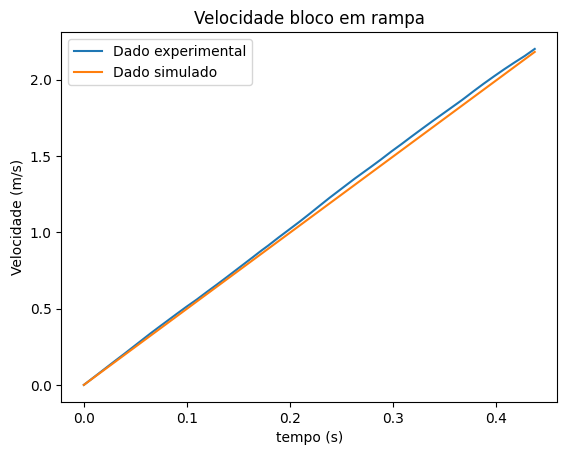

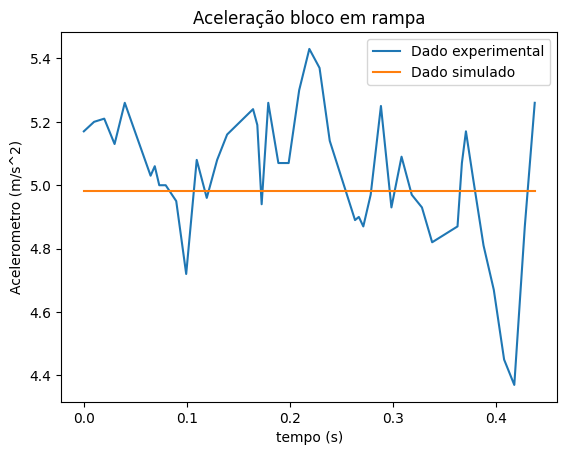

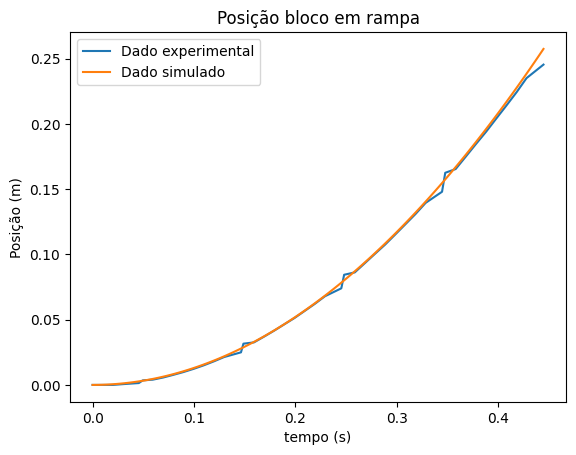

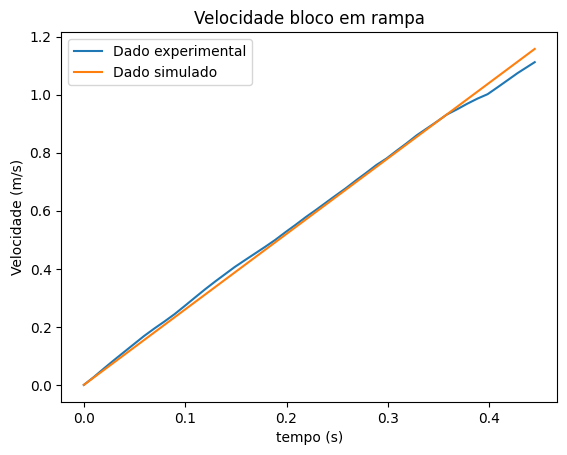

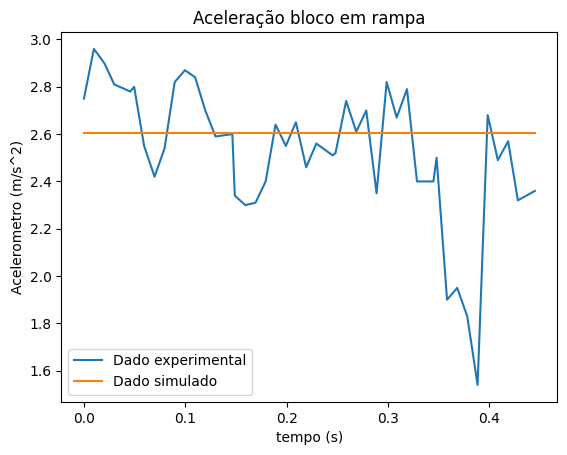

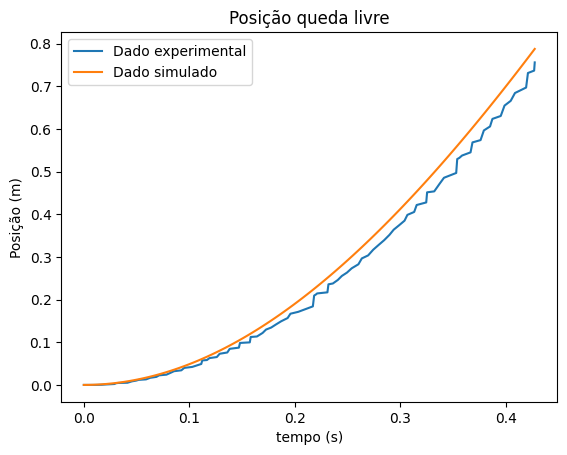

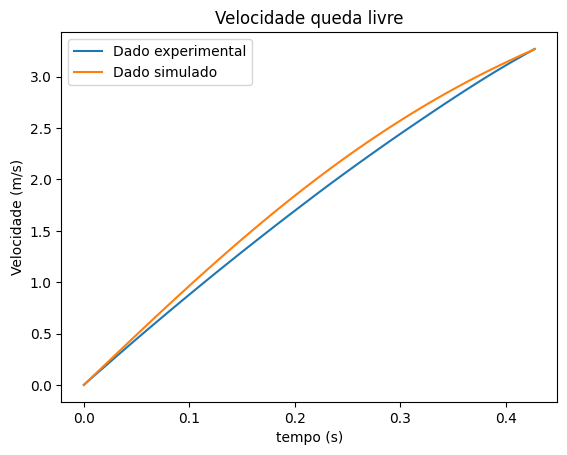

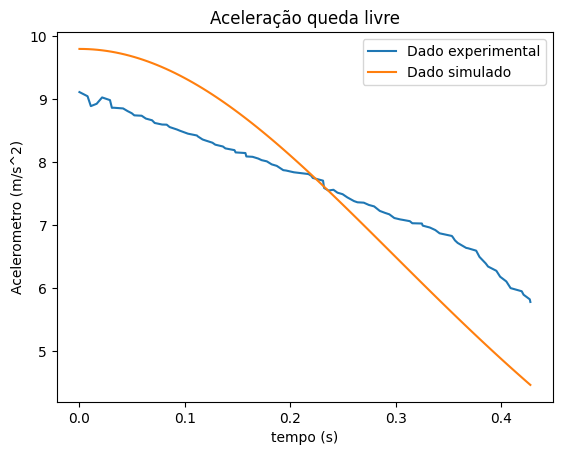

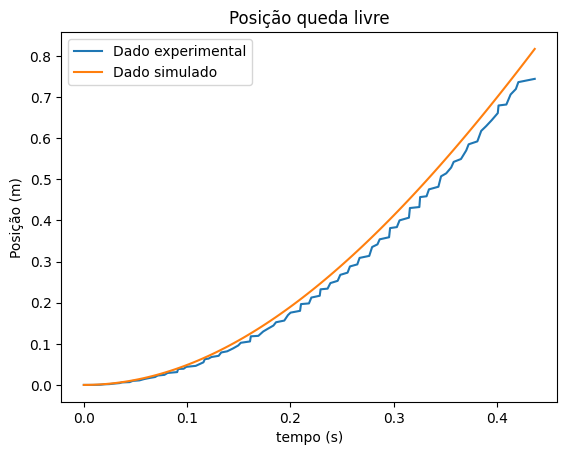

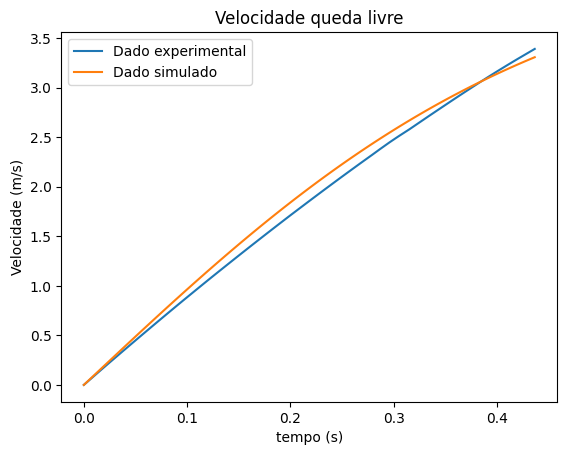

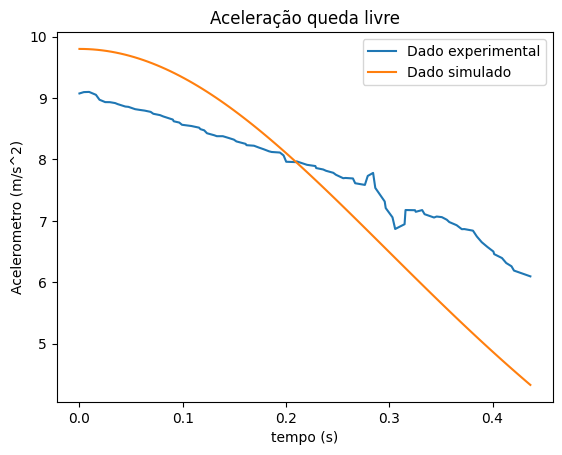

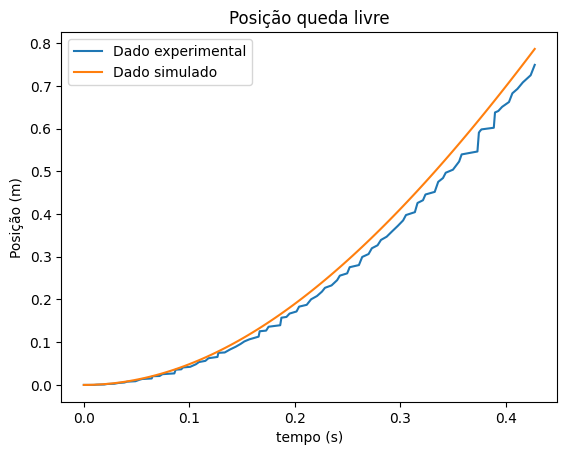

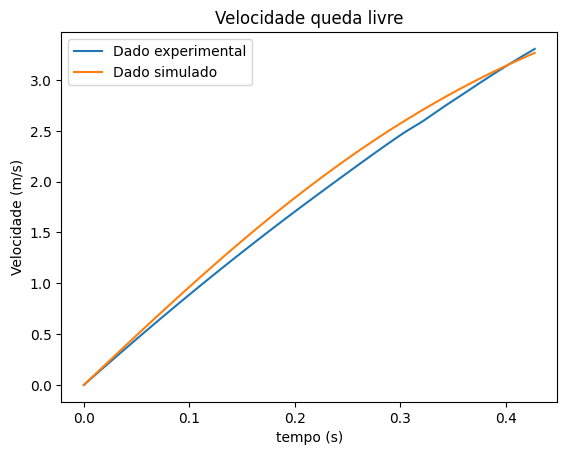

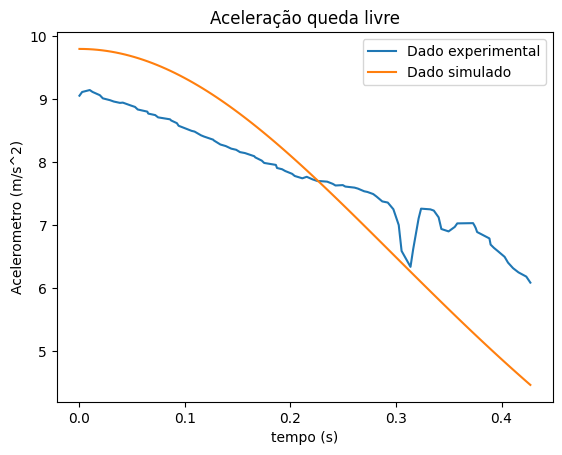

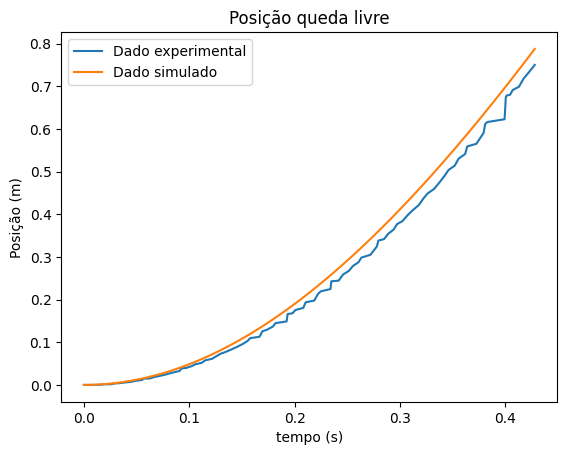

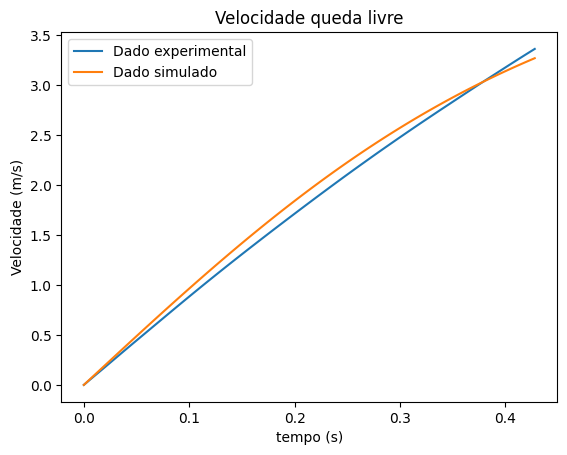

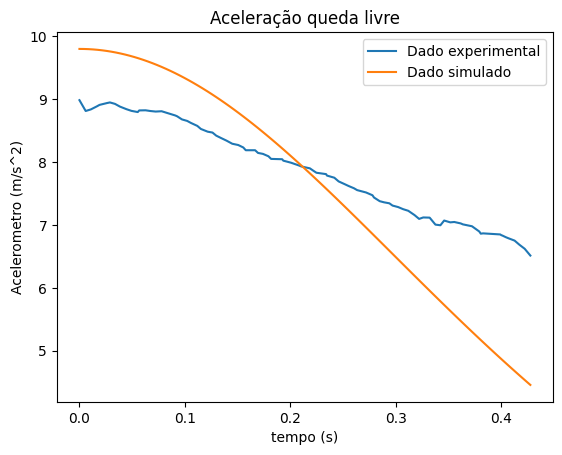

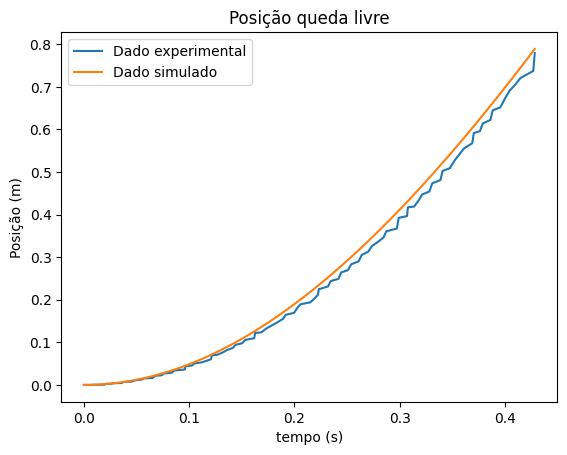

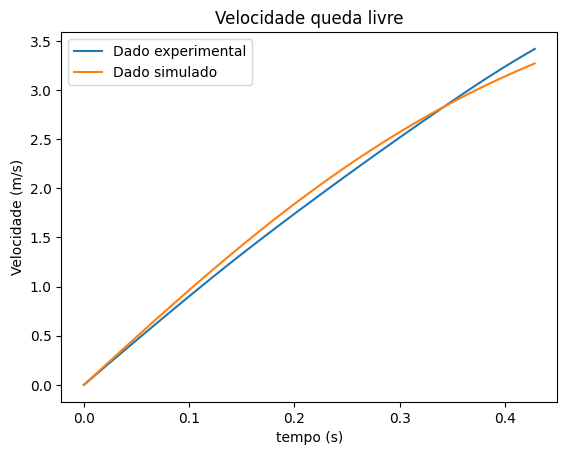

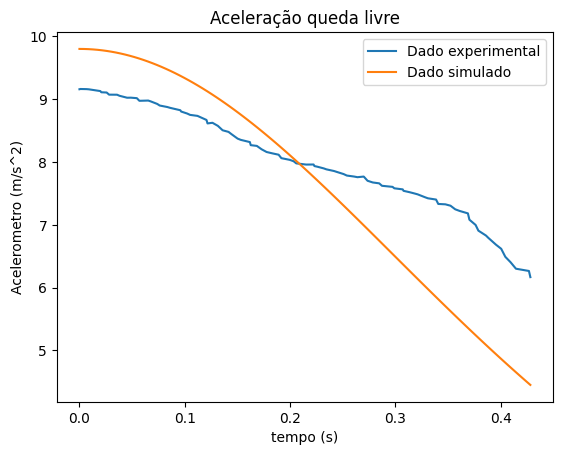

In [ ]:

def plot_simulado_e_experimental(experimental, tempo_experimental, simulado, tempo_simulado, title, ylabel):
   plt.figure()
   plt.plot(tempo_experimental, experimental, label= "Dado experimental")
   plt.plot(tempo_simulado, simulado, label = "Dado simulado")
   plt.xlabel('tempo (s)')
   plt.ylabel(ylabel)
   plt.title(title)
   plt.legend()
   plt.show()

# Queda Livre

def plot_aceleracao_simulado_e_experimental_ql(experimental, tempo_experimental):
  tempo_simulado = get_tempos(100, 0, tempo_experimental[-1])
  aceleracao = get_dados_simulados_queda_livre(tempo_simulado, aceleracao_queda_livre, 0.25, 0.5)
  plot_simulado_e_experimental(experimental, tempo_experimental, aceleracao, tempo_simulado, "Aceleração queda livre", "Acelerometro (m/s^2)")

def plot_velocidade_simulado_e_experimental_ql(experimental, tempo_experimental):
  tempo_simulado = get_tempos(100, 0, tempo_experimental[-1])
  velocidade = get_dados_simulados_queda_livre(tempo_simulado, velocidade_queda_livre, 0.25, 0.5)
  plot_simulado_e_experimental(experimental, tempo_experimental, velocidade, tempo_simulado, "Velocidade queda livre", "Velocidade (m/s)")

def plot_posicao_simulado_e_experimental_ql(experimental, tempo_experimental):
  tempo_simulado = get_tempos(100, 0, tempo_experimental[-1])
  posicao = get_dados_simulados_queda_livre(tempo_simulado, posicao_queda_livre, 0.25, 0.5)
  plot_simulado_e_experimental(experimental, tempo_experimental, posicao, tempo_simulado, "Posição queda livre", "Posição (m)")

# Bloco em Rampa

def plot_aceleracao_simulado_e_experimental_rp(experimental, tempo_experimental, theta, k):
  tempo_simulado = get_tempos(100, 0, tempo_experimental[-1])
  aceleracao = get_dados_simulados_bloco_em_rampa(tempo_simulado, aceleracao_bloco_em_rampa, theta, k)
  plot_simulado_e_experimental(experimental, tempo_experimental, aceleracao, tempo_simulado, "Aceleração bloco em rampa", "Acelerometro (m/s^2)")

def plot_velocidade_simulado_e_experimental_rp(experimental, tempo_experimental, theta, k):
  tempo_simulado = get_tempos(100, 0, tempo_experimental[-1])
  velocidade = get_dados_simulados_bloco_em_rampa(tempo_simulado, velocidade_bloco_em_rampa, theta, k)
  plot_simulado_e_experimental(experimental, tempo_experimental, velocidade, tempo_simulado, "Velocidade bloco em rampa", "Velocidade (m/s)")

def plot_posicao_simulado_e_experimental_rp(experimental, tempo_experimental, theta, k):
  tempo_simulado = get_tempos(100, 0, tempo_experimental[-1])
  posicao = get_dados_simulados_bloco_em_rampa(tempo_simulado, posicao_bloco_em_rampa, theta, k)
  plot_simulado_e_experimental(experimental, tempo_experimental, posicao, tempo_simulado, "Posição bloco em rampa", "Posição (m)")


# Função para plotar os dados simulados e experimentais de um movimento de queda livre
def plota_dados_comparativos_queda_livre(movimento_queda_livre):
  picos = get_picos_do_movimento(movimento_queda_livre)
  for i in range(0, len(picos)):
    p = get_posicao_durante_movimento(movimento_queda_livre, -115, -25)
    tempo_experimental_ql = p[i][1]
    posicoes_experimental_ql = p[i][0]

    plot_posicao_simulado_e_experimental_ql(posicoes_experimental_ql, tempo_experimental_ql)

    v = get_velocidade_durante_movimento(movimento_queda_livre, -115, -25)
    tempo_v_e_ql = v[i][1]
    velocidade_e_ql = v[i][0]

    plot_velocidade_simulado_e_experimental_ql(velocidade_e_ql, tempo_v_e_ql)

    a = get_aceleracoes_durante_movimento(movimento_queda_livre, -115, -25)
    tempo_a_e_ql = a[i][1]
    aceleracoes_e_ql = a[i][0]

    plot_aceleracao_simulado_e_experimental_ql(aceleracoes_e_ql, tempo_a_e_ql)

# Função para plotar os dados experimentais e simulados do movimento de bloco em rampa
def plota_dados_comparativos_bloco_em_rampa(movimento_bloco_em_rampa, theta, k):
  picos = get_picos_do_movimento(movimento_bloco_em_rampa)
  for i in range(0, len(picos)):
    p = get_posicao_durante_movimento(movimento_bloco_em_rampa, -50, -5)
    tempo_experimental_rp = p[0][1]
    posicoes_experimental_rp = p[0][0]

    plot_posicao_simulado_e_experimental_rp(posicoes_experimental_rp, tempo_experimental_rp, theta, k)

    v = get_velocidade_durante_movimento(movimento_bloco_em_rampa, -50, -5)
    tempo_v_e_rp = v[0][1]
    velocidade_e_rp = v[0][0]

    plot_velocidade_simulado_e_experimental_rp(velocidade_e_rp, tempo_v_e_rp, theta, k)

    a = get_aceleracoes_durante_movimento(movimento_bloco_em_rampa, -50, -5)
    tempo_a_e_rp = a[0][1]
    aceleracoes_e_rp = a[0][0]

    plot_aceleracao_simulado_e_experimental_rp(aceleracoes_e_rp, tempo_a_e_rp, theta, k)

# Plotando os dados comparativos do bloco em rampa
plota_dados_comparativos_bloco_em_rampa(rp02, 0.8, 0.3)
plota_dados_comparativos_bloco_em_rampa(rp04, 0.8, 0.3)
plota_dados_comparativos_bloco_em_rampa(rp05, 0.523, 0.27)

# Plotando os dados comparativos da queda livre
plota_dados_comparativos_queda_livre(ql03)
plota_dados_comparativos_queda_livre(ql02)
plota_dados_comparativos_queda_livre(ql01)
